<a href="https://colab.research.google.com/github/uditrajmr3/tensorflow/blob/main/01_neural_regression_wth_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating data to view and fit

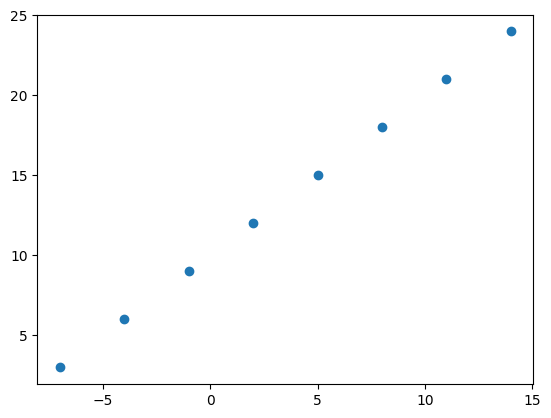

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14., ])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24., ])

# Visualize it
plt.scatter(X, y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
# Turn NumPy arrays into tensors
tensor_X = tf.constant(X, dtype=tf.float32)
tensor_y = tf.constant(y, dtype=tf.float32)
tensor_X, tensor_y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
tensor_input_shape = tensor_X[0].shape
tensor_output_shape = tensor_y[0].shape
tensor_input_shape, tensor_output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X and y (features & labels).

In [9]:
# Set random seed
tf.random.set_seed(26)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae: mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd: stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 580ms/step - loss: 13.2104 - mae: 13.2104
Epoch 2/20
1/1 [==============================] - 0s 10ms/step - loss: 13.0779 - mae: 13.0779
Epoch 3/20
1/1 [==============================] - 0s 15ms/step - loss: 12.9454 - mae: 12.9454
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 12.8129 - mae: 12.8129
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 12.6804 - mae: 12.6804
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 12.5479 - mae: 12.5479
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 12.4154 - mae: 12.4154
Epoch 8/20
1/1 [==============================] - 0s 12ms/step - loss: 12.2829 - mae: 12.2829
Epoch 9/20
1/1 [==============================] - 0s 11ms/step - loss: 12.1504 - mae: 12.1504
Epoch 10/20
1/1 [==============================] - 0s 12ms/step - loss: 12.0179 - mae: 12.0179
Epoch 11/20
1/1 [==============================] - 0s 11ms

In [10]:
# Check out tensor_X and tensor_y
tensor_X, tensor_y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 100ms/step


array([[13.506781]], dtype=float32)

In [12]:
y_pred + 13

array([[26.50678]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model**: here we might add more layers, increase the number of hidden units (all called neurons) within each of those hidden layers, change the activation function of each layer.
2. **Compiling a model**: here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model**: here we might fit a model of more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 413ms/step - loss: 11.2884 - mae: 11.2884
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.1559 - mae: 11.1559
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0234 - mae: 11.0234
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8909 - mae: 10.8909
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.7584 - mae: 10.7584
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.6259 - mae: 10.6259
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4934 - mae: 10.4934
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.3609 - mae: 10.3609
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 10.2284 - mae: 10.2284
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 10.0959 - mae: 10.0959
Epoch 11/100
1/1 [==============================

In [14]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 124ms/step


array([[30.014482]], dtype=float32)

In [15]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 727ms/step - loss: 13.2407 - mae: 13.2407
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 12.6164 - mae: 12.6164
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.9895 - mae: 11.9895
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 11.3540 - mae: 11.3540
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 10.7111 - mae: 10.7111
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0471 - mae: 10.0471
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3569 - mae: 9.3569
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6355 - mae: 8.6355
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.9045 - mae: 7.9045
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1493 - mae: 7.1493
Epoch 11/100
1/1 [==============================] - 0s 1

array([[31.396856]], dtype=float32)

In [16]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 0s 428ms/step - loss: 13.4195 - mae: 13.4195
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.9181 - mae: 12.9181
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4150 - mae: 12.4150
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 11.9076 - mae: 11.9076
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.3932 - mae: 11.3932
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8692 - mae: 10.8692
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3329 - mae: 10.3329
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7815 - mae: 9.7815
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 9.2123 - mae: 9.2123
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6222 - mae: 8.6222
Epoch 11/100
1/1 [==============================] - 0s

array([[29.914576]], dtype=float32)

In [17]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 643ms/step - loss: 13.2987 - mae: 13.2987
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.2059 - mae: 13.2059
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 13.1131 - mae: 13.1131
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0203 - mae: 13.0203
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 12.9275 - mae: 12.9275
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 12.8346 - mae: 12.8346
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7417 - mae: 12.7417
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 12.6488 - mae: 12.6488
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5558 - mae: 12.5558
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4628 - mae: 12.4628
Epoch 11/100
1/1 [==============================

1/1 [==============================] - 0s 72ms/step


array([[30.491703]], dtype=float32)

In [18]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 617ms/step - loss: 14.3998 - mae: 14.3998
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4442 - mae: 13.4442
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.4980 - mae: 12.4980
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 11.5560 - mae: 11.5560
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6105 - mae: 10.6105
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6529 - mae: 9.6529
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.6754 - mae: 8.6754
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 7.6705 - mae: 7.6705
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7070 - mae: 6.7070
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8470 - mae: 6.8470
Epoch 11/100
1/1 [==============================] - 0s 11m

1/1 [==============================] - 0s 109ms/step


array([[26.869312]], dtype=float32)

In [19]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 952ms/step - loss: 14.4790 - mae: 14.4790
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 14.3715 - mae: 14.3715
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 14.2642 - mae: 14.2642
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 14.1570 - mae: 14.1570
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 14.0500 - mae: 14.0500
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.9432 - mae: 13.9432
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 13.8365 - mae: 13.8365
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 13.7299 - mae: 13.7299
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 13.6235 - mae: 13.6235
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 13.5172 - mae: 13.5172
Epoch 11/100
1/1 [==============================

array([[30.156563]], dtype=float32)

In [20]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 957ms/step - loss: 13.7401 - mae: 13.7401
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5746 - mae: 7.5746
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 14.5881 - mae: 14.5881
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0809 - mae: 13.0809
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9732 - mae: 8.9732
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 7.1700 - mae: 7.1700
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5162 - mae: 8.5162
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9363 - mae: 8.9363
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 8.7394 - mae: 8.7394
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0826 - mae: 8.0826
Epoch 11/100
1/1 [==============================] - 0s 12ms/st

array([[27.005323]], dtype=float32)

In [21]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.1250 - mae: 13.1250
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4772 - mae: 12.4772
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 10.7182 - mae: 10.7182
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6267 - mae: 11.6267
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 9.9901 - mae: 9.9901
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6012 - mae: 7.6012
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 7.2097 - mae: 7.2097
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8927 - mae: 6.8927
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 6.7858 - mae: 6.7858
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 7.2041 - mae: 7.2041
Epoch 11/100
1/1 [==============================] - 0s 15ms/ste

array([[25.80537]], dtype=float32)

In [22]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=1000)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 14.6276 - mae: 14.6276
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 9.0780 - mae: 9.0780
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 12.1648 - mae: 12.1648
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 12.0274 - mae: 12.0274
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 9.3666 - mae: 9.3666
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 6.5936 - mae: 6.5936
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 7.2144 - mae: 7.2144
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 6.0907 - mae: 6.0907
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.9311 - mae: 5.9311
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 6.0387 - mae: 6.0387
Epoch 11/1000
1/1 [==============================] - 0s

array([[28.986906]], dtype=float32)

In [23]:
# Make a bigger dataset
X = tf.range(-200, 200, 4)
X

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-200, -196, -192, -188, -184, -180, -176, -172, -168, -164, -160,
       -156, -152, -148, -144, -140, -136, -132, -128, -124, -120, -116,
       -112, -108, -104, -100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,
        -68,  -64,  -60,  -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,
        -24,  -20,  -16,  -12,   -8,   -4,    0,    4,    8,   12,   16,
         20,   24,   28,   32,   36,   40,   44,   48,   52,   56,   60,
         64,   68,   72,   76,   80,   84,   88,   92,   96,  100,  104,
        108,  112,  116,  120,  124,  128,  132,  136,  140,  144,  148,
        152,  156,  160,  164,  168,  172,  176,  180,  184,  188,  192,
        196], dtype=int32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-190, -186, -182, -178, -174, -170, -166, -162, -158, -154, -150,
       -146, -142, -138, -134, -130, -126, -122, -118, -114, -110, -106,
       -102,  -98,  -94,  -90,  -86,  -82,  -78,  -74,  -70,  -66,  -62,
        -58,  -54,  -50,  -46,  -42,  -38,  -34,  -30,  -26,  -22,  -18,
        -14,  -10,   -6,   -2,    2,    6,   10,   14,   18,   22,   26,
         30,   34,   38,   42,   46,   50,   54,   58,   62,   66,   70,
         74,   78,   82,   86,   90,   94,   98,  102,  106,  110,  114,
        118,  122,  126,  130,  134,  138,  142,  146,  150,  154,  158,
        162,  166,  170,  174,  178,  182,  186,  190,  194,  198,  202,
        206], dtype=int32)>

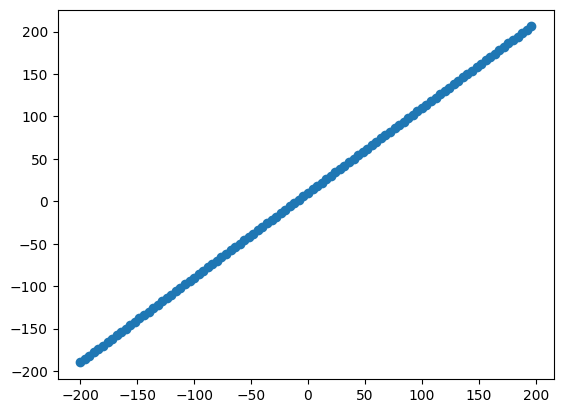

In [25]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training Set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation Set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test Set** - the model gets evaluated on this data to test what model as learned, this set is typically 10-15% of the total data available.

In [26]:
# Check the length of how many samples are avialable
len(X)

100

In [27]:
# Split the data into train and test sets
X_train = X[:80] # (80% data from training)
y_train = y[:80] # (80% data from training)
X_test = X[80:] # (20% data for testing)
y_test = y[80:] # (20% data for testing)

len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

### Visualize the data

Now that the data is divided into training and test sets, let's visualize it again

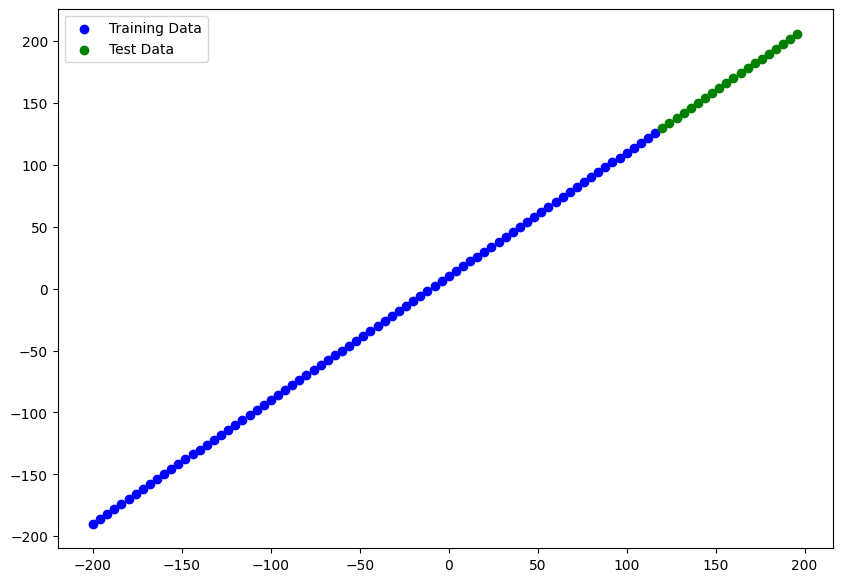

In [28]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")
# show a legend
plt.legend();

In [29]:
# Let's build a neural network for this data
# 0. Set the seed
tf.random.set_seed(26)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 14ms/step - loss: 112.3585 - mae: 112.3585
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 109.8003 - mae: 109.8003
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 107.2639 - mae: 107.2639
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 104.7208 - mae: 104.7208
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 102.1201 - mae: 102.1201
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 99.5773 - mae: 99.5773
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 97.0249 - mae: 97.0249
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 94.4273 - mae: 94.4273
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 91.9124 - mae: 91.9124
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 89.2821 - mae: 89.2821
Epoch 11/100
3/3 [==============================

### Visualizing the model

In [30]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 263ms/step - loss: 16.0969 - mae: 16.0969


[16.096874237060547, 16.096874237060547]

In [32]:
# let's create a model which builds automatically by defining the input_shape argument

# 0. Set the seed
tf.random.set_seed(26)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, input_shape=[1], name="output_layer")
], name="model_with_input_shape")

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

In [33]:
model.summary()

Model: "model_with_input_shape"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total numbers of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameters - these are the parameters (patterns) the model cannot update as it trains. this is typical when we bring in the already learnt patterns or parameters from other models during **transfer learning**.

In [34]:
# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [35]:
model.summary()

Model: "model_with_input_shape"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 190ms/step - loss: 4.6188 - mae: 4.6188


[4.618770599365234, 4.618770599365234]

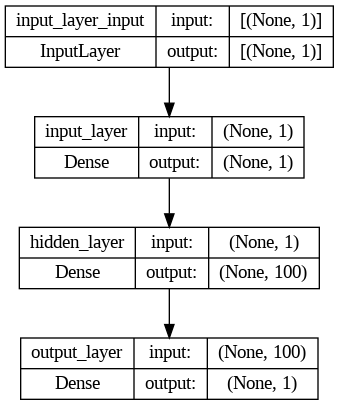

In [37]:
from tensorflow import keras
from keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth vs model's predictions).

In [38]:
# Let's make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 120ms/step


array([[126.46362],
       [130.34969],
       [134.23575],
       [138.12184],
       [142.00787],
       [145.89392],
       [149.78   ],
       [153.66606],
       [157.55214],
       [161.43817],
       [165.32426],
       [169.21031],
       [173.09639],
       [176.98245],
       [180.86853],
       [184.75458],
       [188.64061],
       [192.52672],
       [196.41278],
       [200.29883]], dtype=float32)

In [39]:
y_test, y_pred

(<tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([130, 134, 138, 142, 146, 150, 154, 158, 162, 166, 170, 174, 178,
        182, 186, 190, 194, 198, 202, 206], dtype=int32)>,
 array([[126.46362],
        [130.34969],
        [134.23575],
        [138.12184],
        [142.00787],
        [145.89392],
        [149.78   ],
        [153.66606],
        [157.55214],
        [161.43817],
        [165.32426],
        [169.21031],
        [173.09639],
        [176.98245],
        [180.86853],
        [184.75458],
        [188.64061],
        [192.52672],
        [196.41278],
        [200.29883]], dtype=float32))

In [40]:
# Let's create a plotting function
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred
):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # plot the training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # plot the test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  # plot the predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # add the legend for info
  plt.legend();


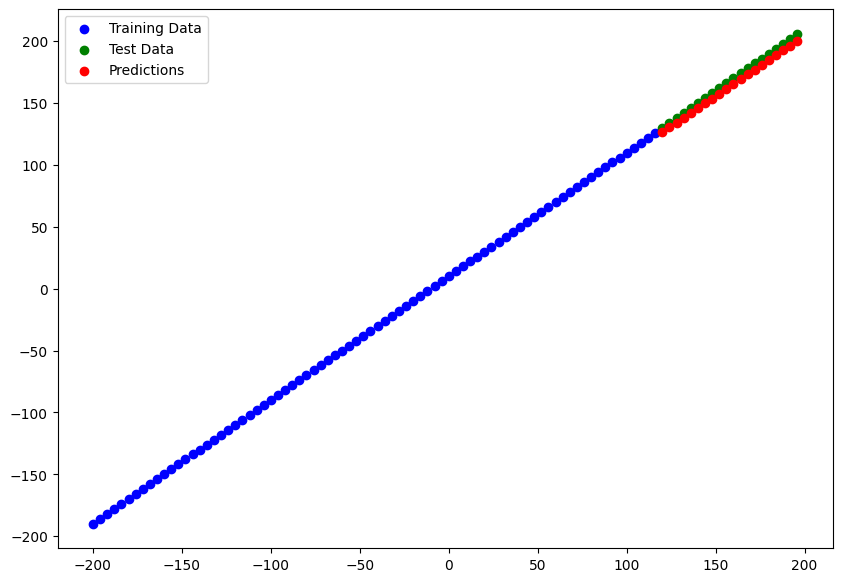

In [41]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred
    )

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE: mean absolute error; "on average, how wrong is each of the model's predictions"
* MSE: mean square error; "square the average errors"
* Huber: Combination of MAE &  MSE

In [42]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 44ms/step - loss: 4.6188 - mae: 4.6188


[4.618770599365234, 4.618770599365234]

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([41.536377, 37.685284, 34.211403, 31.11471 , 28.395275, 26.063648,
       24.11    , 22.533575, 21.334358, 20.512365, 20.067574, 20.      ,
       20.309639, 20.99649 , 22.060558, 23.501831, 25.320305, 27.516031,
       30.088947, 33.039062], dtype=float32)>

In [44]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([126.46362, 130.34969, 134.23575, 138.12184, 142.00787, 145.89392,
       149.78   , 153.66606, 157.55214, 161.43817, 165.32426, 169.21031,
       173.09639, 176.98245, 180.86853, 184.75458, 188.64061, 192.52672,
       196.41278, 200.29883], dtype=float32)>

In [45]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([130, 134, 138, 142, 146, 150, 154, 158, 162, 166, 170, 174, 178,
       182, 186, 190, 194, 198, 202, 206], dtype=int32)>

In [46]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=4.6187735>

In [47]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=21.764704>

In [48]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  y_pred_squeezed = tf.squeeze(y_pred)
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred_squeezed);

In [49]:
def mse(y_true, y_pred):
  y_pred_squeezed = tf.squeeze(y_pred)
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred_squeezed);

### Running experiments to improve the model

1. Get more data - get more examples for the model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in form of more layers or more hidden units in each layers.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

In [50]:
X_train, y_train

(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-200, -196, -192, -188, -184, -180, -176, -172, -168, -164, -160,
        -156, -152, -148, -144, -140, -136, -132, -128, -124, -120, -116,
        -112, -108, -104, -100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,
         -68,  -64,  -60,  -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,
         -24,  -20,  -16,  -12,   -8,   -4,    0,    4,    8,   12,   16,
          20,   24,   28,   32,   36,   40,   44,   48,   52,   56,   60,
          64,   68,   72,   76,   80,   84,   88,   92,   96,  100,  104,
         108,  112,  116], dtype=int32)>,
 <tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-190, -186, -182, -178, -174, -170, -166, -162, -158, -154, -150,
        -146, -142, -138, -134, -130, -126, -122, -118, -114, -110, -106,
        -102,  -98,  -94,  -90,  -86,  -82,  -78,  -74,  -70,  -66,  -62,
         -58,  -54,  -50,  -46,  -42,  -38,  -34,  -30,  -26,  -22,  -18,
         -14,  -10,   -6,   -2,    2,    6,   10,   

In [51]:
# Set the seed
tf.random.set_seed(26)

In [52]:
# Create the model 1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_1")

# compile the model 1
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# fit the model 1
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [53]:
# Create the model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

# compile the model 2
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# fit the model 2
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [54]:
# Create the model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_3")

# compile the model 3
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# fit the model 3
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 49ms/step


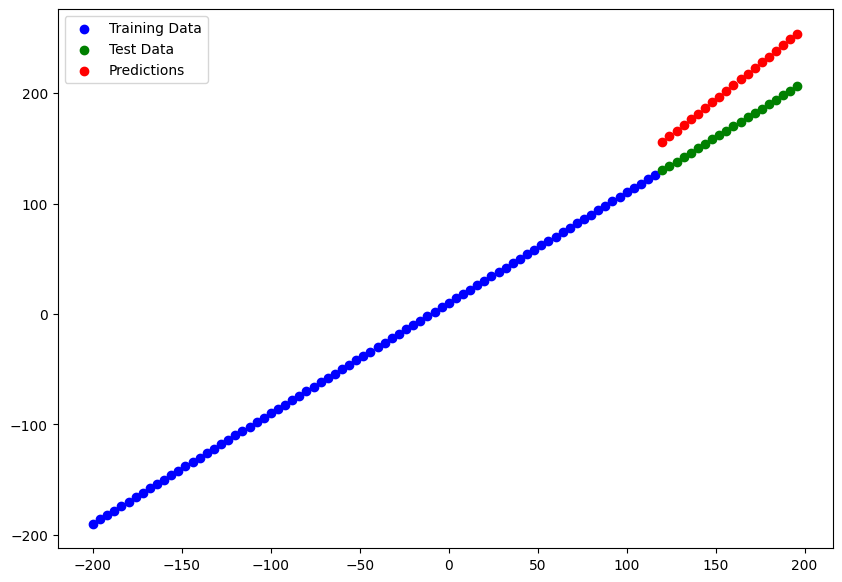

In [55]:
# Make and pllot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_1
)

1/1 [==============================] - 0s 66ms/step


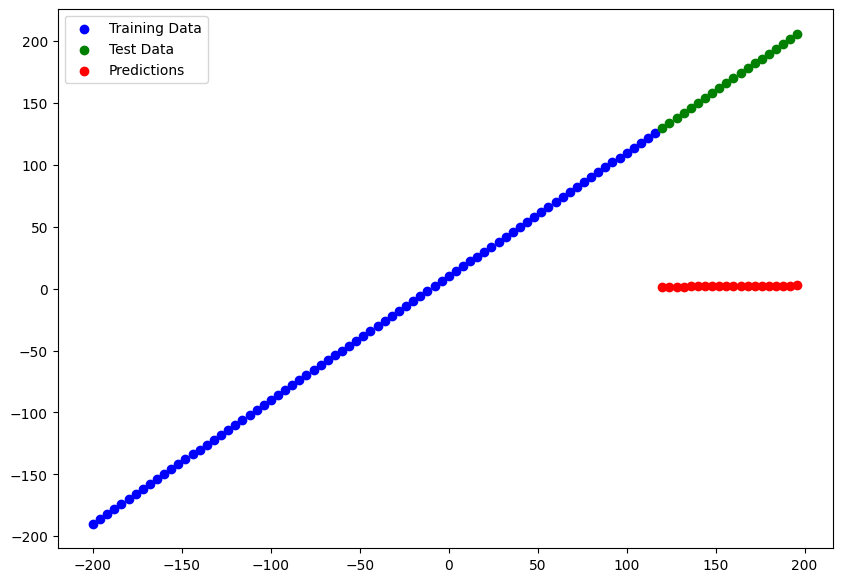

In [56]:
# Make and pllot predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_2
)

1/1 [==============================] - 0s 67ms/step


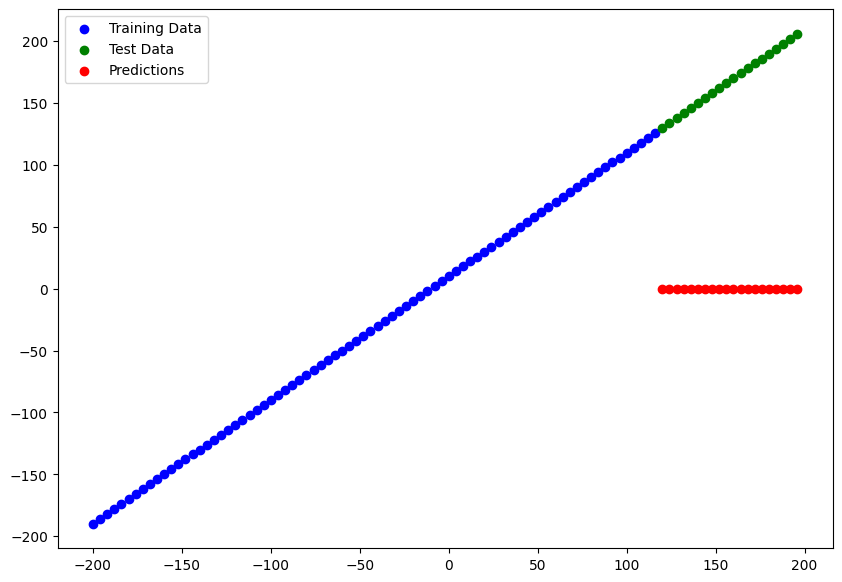

In [57]:
# Make and pllot predictions for model_3
y_pred_3 = model_3.predict(X_test)
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_3
)

In [58]:
y_pred_1

array([[155.56726],
       [160.73311],
       [165.89896],
       [171.0648 ],
       [176.23065],
       [181.3965 ],
       [186.56235],
       [191.7282 ],
       [196.89403],
       [202.05988],
       [207.22572],
       [212.39157],
       [217.55742],
       [222.72327],
       [227.88911],
       [233.05496],
       [238.22081],
       [243.38666],
       [248.5525 ],
       [253.71834]], dtype=float32)

In [59]:
# Calculate the model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=36.642803>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1387.8884>)

In [60]:
# Calculate the model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=165.90433>,
 <tf.Tensor: shape=(), dtype=float32, numpy=28041.95>)

In [61]:
# Calculate the model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=167.86093>,
 <tf.Tensor: shape=(), dtype=float32, numpy=28709.256>)

In [62]:
# Create the model 4
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_4")

# compile the model 4
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# fit the model 4
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [63]:
# Create the model 5
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer"),
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_4")

# compile the model 5
model_5.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# fit the model 5
model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 55ms/step


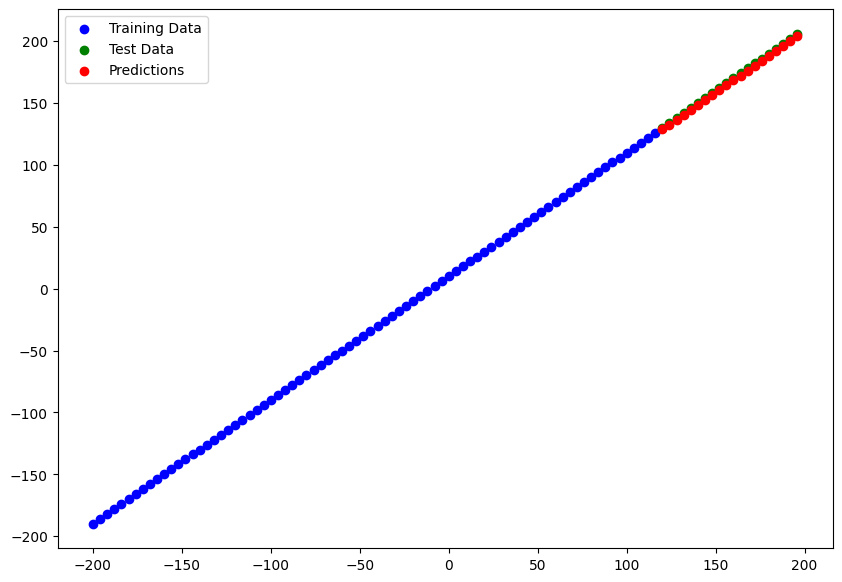

In [64]:
# Make and pllot predictions for model_4
y_pred_4 = model_4.predict(X_test)
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_4
)

1/1 [==============================] - 0s 59ms/step


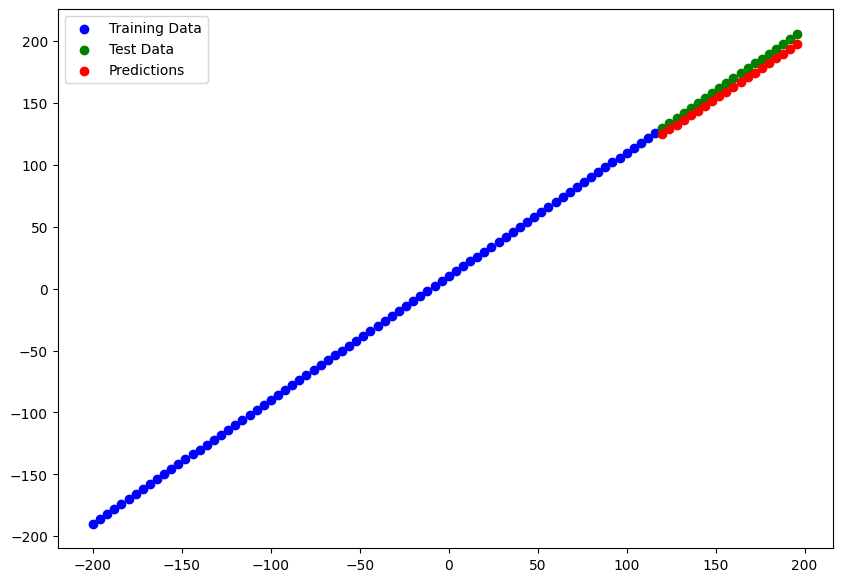

In [65]:
# Make and pllot predictions for model_5
y_pred_5 = model_5.predict(X_test)
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_5
)

In [66]:
# Calculate the model_4 evaluation metrics
mae_4 = mae(y_test, y_pred_4)
mse_4 = mse(y_test, y_pred_4)

mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6764266>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.8553898>)

In [67]:
# Calculate the model_5 evaluation metrics
mae_5 = mae(y_test, y_pred_5)
mse_5 = mse(y_test, y_pred_5)

mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=6.8270006>,
 <tf.Tensor: shape=(), dtype=float32, numpy=47.599884>)

### Comparing the results of the experiments

We've run a few experiments, let's compare the results.

In [68]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results =[
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()],
    ["model_4", mae_4.numpy(), mse_4.numpy()],
    ["model_5", mae_5.numpy(), mse_5.numpy()],
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,36.642803,1387.888428
1,model_2,165.904327,28041.949219
2,model_3,167.860931,28709.255859
3,model_4,1.676427,2.855390
4,model_5,6.827001,47.599884


In [69]:
model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Tracking the experiments

One really good habit in machine learning modelling is to track the results of the experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us:

* TensorBoard - a component of the TensorFLow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving The Models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app.

There are 2 ways of saving the models:

1. The SavedModel format
2. The HDF5 format (Depricated)
3. Keras Format

In [70]:
# Save model using SavedModel format
model_5.save("best_model_SavedModel_format")

In [71]:
# Save model using HDF5 format
model_5.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
# Save model using keras format
model_5.save("best_model_Keras_format.keras")

## Loading a saved model

In [73]:
# Load in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# Compare model 5 predictions with SavedModel format model predictions
model_5_preds = model_5.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_5_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 24ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [76]:
# Load in the HDF5 format
loaded_HDF5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_HDF5_format.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Compare model 5 predictions with HDF5 format modal predictions
model_5_preds = model_5.predict(X_test)
loaded_HDF5_format_preds = loaded_HDF5_format.predict(X_test)
model_5_preds == loaded_HDF5_format_preds

1/1 [==============================] - 0s 105ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [78]:
# Load in the Keras format
loaded_Keras_format = tf.keras.models.load_model("best_model_Keras_format.keras")
loaded_Keras_format.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
# Compare model 5 predictions woth Keras format model preictions
model_5_preds = model_5.predict(X_test)
loaded_Keras_format_preds = loaded_Keras_format.predict(X_test)
model_5_preds == loaded_Keras_format_preds

1/1 [==============================] - 0s 169ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download"
2. Use code (see the cell below)
3. Save it to Google Drive by connecting google drive and copying it from ther (see 2nd code cell below)

In [81]:
# Download a file from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_models/

In [84]:
!ls /content/drive/MyDrive/tensorflow_models/

best_model_HDF5_format.h5
